# Exploratory Data Analysis : Weather

In [915]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json

from datetime import datetime

## Reading JSON File

In [916]:
# Open and read the JSON file
with open('data_kathmandu_weather.json', 'r') as file:
    data = json.load(file)

In [917]:
print(data[0])

{'timestamp': 1739324654, 'data': {'coord': {'lon': 85.324, 'lat': 27.7172}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 281.3, 'feels_like': 280.64, 'temp_min': 281.3, 'temp_max': 281.3, 'pressure': 1015, 'humidity': 87, 'sea_level': 1015, 'grnd_level': 850}, 'visibility': 2000, 'wind': {'speed': 1.54, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1739324654, 'sys': {'type': 1, 'id': 9201, 'country': 'NP', 'sunrise': 1739321916, 'sunset': 1739362048}, 'timezone': 20700, 'id': 1282682, 'name': 'Thapathali', 'cod': 200}}


## Flatting JSON to `list[dict]`

In [918]:
flat_dict = []

In [919]:
for i in data:
    d = {
        'timestamp': i['timestamp'],
        'datetime': datetime.fromtimestamp(i['timestamp']).strftime('%Y-%m-%d %H:%M:%S'),
        'longitude': i['data']['coord']['lon'],
        'latitude': i['data']['coord']['lat'],
        'weather_id': i['data']['weather'][0]['id'],
        'weather_main': i['data']['weather'][0]['main'],
        'weather_description': i['data']['weather'][0]['description'],
        'temperature': i['data']['main']['temp'],
        'feels_like': i['data']['main']['feels_like'],
        'temp_min': i['data']['main']['temp_min'],
        'temp_max': i['data']['main']['temp_max'],
        'pressure': i['data']['main']['pressure'],
        'humidity': i['data']['main']['humidity'],
        'sea_level': i['data']['main']['sea_level'],
        'ground_level': i['data']['main']['grnd_level'],
        'visibility': i['data']['visibility'],
        'wind_speed': i['data']['wind']['speed'],
        'wind_degree': i['data']['wind']['deg'],
        'clouds_percentage': i['data']['clouds']['all'],
        'country': i['data']['sys']['country'],
        'sunrise': datetime.fromtimestamp(i['data']['sys']['sunrise']).strftime('%Y-%m-%d %H:%M:%S'),
        'sunrise_timestamp': i['data']['sys']['sunrise'],
        'sunset': datetime.fromtimestamp(i['data']['sys']['sunset']).strftime('%Y-%m-%d %H:%M:%S'),
        'sunset_timestamp': i['data']['sys']['sunset'],
        'timezone': i['data']['timezone'],
        'city_id': i['data']['id'],
        'city_name': i['data']['name']
    }
    flat_dict.append(d)

In [920]:
flat_dict[0]

{'timestamp': 1739324654,
 'datetime': '2025-02-12 07:29:14',
 'longitude': 85.324,
 'latitude': 27.7172,
 'weather_id': 701,
 'weather_main': 'Mist',
 'weather_description': 'mist',
 'temperature': 281.3,
 'feels_like': 280.64,
 'temp_min': 281.3,
 'temp_max': 281.3,
 'pressure': 1015,
 'humidity': 87,
 'sea_level': 1015,
 'ground_level': 850,
 'visibility': 2000,
 'wind_speed': 1.54,
 'wind_degree': 100,
 'clouds_percentage': 20,
 'country': 'NP',
 'sunrise': '2025-02-12 06:43:36',
 'sunrise_timestamp': 1739321916,
 'sunset': '2025-02-12 17:52:28',
 'sunset_timestamp': 1739362048,
 'timezone': 20700,
 'city_id': 1282682,
 'city_name': 'Thapathali'}

## Getting DataFrame from  `list[dict]`

In [921]:
df = pd.DataFrame(flat_dict)
df

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,wind_degree,clouds_percentage,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63790,1739842396,2025-02-18 07:18:16,85.324,27.7172,701,Mist,mist,282.3,281.79,282.3,...,180,20,NP,2025-02-18 06:38:49,1739840029,2025-02-18 17:56:46,1739880706,20700,1282682,Thapathali
63791,1739842396,2025-02-18 07:18:16,85.324,27.7172,701,Mist,mist,282.3,281.79,282.3,...,180,20,NP,2025-02-18 06:38:49,1739840029,2025-02-18 17:56:46,1739880706,20700,1282682,Thapathali
63792,1739842396,2025-02-18 07:18:16,85.324,27.7172,701,Mist,mist,282.3,281.79,282.3,...,180,20,NP,2025-02-18 06:38:49,1739840029,2025-02-18 17:56:46,1739880706,20700,1282682,Thapathali
63793,1739842396,2025-02-18 07:18:16,85.324,27.7172,701,Mist,mist,282.3,281.79,282.3,...,180,20,NP,2025-02-18 06:38:49,1739840029,2025-02-18 17:56:46,1739880706,20700,1282682,Thapathali


In [922]:
df.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,wind_degree,clouds_percentage,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali


In [923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63795 non-null  int64  
 1   datetime             63795 non-null  object 
 2   longitude            63795 non-null  float64
 3   latitude             63795 non-null  float64
 4   weather_id           63795 non-null  int64  
 5   weather_main         63795 non-null  object 
 6   weather_description  63795 non-null  object 
 7   temperature          63795 non-null  float64
 8   feels_like           63795 non-null  float64
 9   temp_min             63795 non-null  float64
 10  temp_max             63795 non-null  float64
 11  pressure             63795 non-null  int64  
 12  humidity             63795 non-null  int64  
 13  sea_level            63795 non-null  int64  
 14  ground_level         63795 non-null  int64  
 15  visibility           63795 non-null 

In [924]:
df.describe()

,timestamp,longitude,latitude,weather_id,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage,sunrise_timestamp,sunset_timestamp,timezone,city_id
count,6.379500e+04,63795.000000,6.379500e+04,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,6.379500e+04,6.379500e+04,63795.0,63795.0
mean,1.739555e+09,85.324000,2.771720e+01,757.104836,286.275594,285.549668,286.275594,286.275594,1013.646587,69.152379,1013.646587,849.942848,5266.357865,2.080942,117.674269,33.370092,1.739535e+09,1.739576e+09,20700.0,1282682.0
std,1.496800e+05,0.000002,3.552742e-15,46.382713,3.723176,3.516453,3.723176,3.723176,2.592418,19.063112,2.592418,1.736514,1552.782738,1.629196,105.049298,20.606924,1.528505e+05,1.530108e+05,0.0,0.0
min,1.739325e+09,85.323900,2.771720e+01,701.000000,280.300000,278.970000,280.300000,280.300000,1007.000000,24.000000,1007.000000,846.000000,1500.000000,0.000000,0.000000,20.000000,1.739322e+09,1.739362e+09,20700.0,1282682.0
25%,1.739422e+09,85.324000,2.771720e+01,701.000000,283.300000,282.490000,283.300000,283.300000,1012.000000,55.000000,1012.000000,849.000000,4500.000000,1.030000,0.000000,20.000000,1.739408e+09,1.739448e+09,20700.0,1282682.0
50%,1.739540e+09,85.324000,2.771720e+01,801.000000,285.300000,284.840000,285.300000,285.300000,1014.000000,72.000000,1014.000000,850.000000,6000.000000,1.540000,120.000000,20.000000,1.739495e+09,1.739535e+09,20700.0,1282682.0
75%,1.739680e+09,85.324000,2.771720e+01,801.000000,289.300000,288.410000,289.300000,289.300000,1015.000000,82.000000,1015.000000,851.000000,6000.000000,3.090000,220.000000,40.000000,1.739667e+09,1.739708e+09,20700.0,1282682.0
max,1.739843e+09,85.324000,2.771720e+01,803.000000,293.300000,292.260000,293.300000,293.300000,1019.000000,100.000000,1019.000000,854.000000,8000.000000,7.200000,350.000000,75.000000,1.739840e+09,1.739881e+09,20700.0,1282682.0


In [925]:
type(df)

pandas.core.frame.DataFrame

## Converting to CSV File

In [926]:
df.to_csv('data_kathmandu_weather.csv', encoding='utf-8', index=False)

## Reading From CSV

In [927]:
weather_data = pd.read_csv('data_kathmandu_weather.csv')

In [928]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63795 non-null  int64  
 1   datetime             63795 non-null  object 
 2   longitude            63795 non-null  float64
 3   latitude             63795 non-null  float64
 4   weather_id           63795 non-null  int64  
 5   weather_main         63795 non-null  object 
 6   weather_description  63795 non-null  object 
 7   temperature          63795 non-null  float64
 8   feels_like           63795 non-null  float64
 9   temp_min             63795 non-null  float64
 10  temp_max             63795 non-null  float64
 11  pressure             63795 non-null  int64  
 12  humidity             63795 non-null  int64  
 13  sea_level            63795 non-null  int64  
 14  ground_level         63795 non-null  int64  
 15  visibility           63795 non-null 

In [929]:
weather_data.describe()

,timestamp,longitude,latitude,weather_id,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage,sunrise_timestamp,sunset_timestamp,timezone,city_id
count,6.379500e+04,63795.000000,6.379500e+04,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,6.379500e+04,6.379500e+04,63795.0,63795.0
mean,1.739555e+09,85.324000,2.771720e+01,757.104836,286.275594,285.549668,286.275594,286.275594,1013.646587,69.152379,1013.646587,849.942848,5266.357865,2.080942,117.674269,33.370092,1.739535e+09,1.739576e+09,20700.0,1282682.0
std,1.496800e+05,0.000002,3.552742e-15,46.382713,3.723176,3.516453,3.723176,3.723176,2.592418,19.063112,2.592418,1.736514,1552.782738,1.629196,105.049298,20.606924,1.528505e+05,1.530108e+05,0.0,0.0
min,1.739325e+09,85.323900,2.771720e+01,701.000000,280.300000,278.970000,280.300000,280.300000,1007.000000,24.000000,1007.000000,846.000000,1500.000000,0.000000,0.000000,20.000000,1.739322e+09,1.739362e+09,20700.0,1282682.0
25%,1.739422e+09,85.324000,2.771720e+01,701.000000,283.300000,282.490000,283.300000,283.300000,1012.000000,55.000000,1012.000000,849.000000,4500.000000,1.030000,0.000000,20.000000,1.739408e+09,1.739448e+09,20700.0,1282682.0
50%,1.739540e+09,85.324000,2.771720e+01,801.000000,285.300000,284.840000,285.300000,285.300000,1014.000000,72.000000,1014.000000,850.000000,6000.000000,1.540000,120.000000,20.000000,1.739495e+09,1.739535e+09,20700.0,1282682.0
75%,1.739680e+09,85.324000,2.771720e+01,801.000000,289.300000,288.410000,289.300000,289.300000,1015.000000,82.000000,1015.000000,851.000000,6000.000000,3.090000,220.000000,40.000000,1.739667e+09,1.739708e+09,20700.0,1282682.0
max,1.739843e+09,85.324000,2.771720e+01,803.000000,293.300000,292.260000,293.300000,293.300000,1019.000000,100.000000,1019.000000,854.000000,8000.000000,7.200000,350.000000,75.000000,1.739840e+09,1.739881e+09,20700.0,1282682.0


## Checking Null Values

In [930]:
weather_data.isnull().sum()

timestamp              0
datetime               0
longitude              0
latitude               0
weather_id             0
weather_main           0
weather_description    0
temperature            0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
sea_level              0
ground_level           0
visibility             0
wind_speed             0
wind_degree            0
clouds_percentage      0
country                0
sunrise                0
sunrise_timestamp      0
sunset                 0
sunset_timestamp       0
timezone               0
city_id                0
city_name              0
dtype: int64

## Checking if there is duplicate rows

In [931]:
weather_data.duplicated()

0        False
1         True
2         True
3        False
4         True
         ...  
63790     True
63791     True
63792     True
63793     True
63794     True
Length: 63795, dtype: bool

## Dropping Duplicate Rows

In [932]:
# weather_data_unique = weather_data.drop_duplicates()
weather_data_unique = weather_data

In [933]:
len(weather_data)

63795

In [934]:
len(weather_data_unique)

63795

In [935]:
weather_data_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            63795 non-null  int64  
 1   datetime             63795 non-null  object 
 2   longitude            63795 non-null  float64
 3   latitude             63795 non-null  float64
 4   weather_id           63795 non-null  int64  
 5   weather_main         63795 non-null  object 
 6   weather_description  63795 non-null  object 
 7   temperature          63795 non-null  float64
 8   feels_like           63795 non-null  float64
 9   temp_min             63795 non-null  float64
 10  temp_max             63795 non-null  float64
 11  pressure             63795 non-null  int64  
 12  humidity             63795 non-null  int64  
 13  sea_level            63795 non-null  int64  
 14  ground_level         63795 non-null  int64  
 15  visibility           63795 non-null 

In [936]:
weather_data_unique.describe()

,timestamp,longitude,latitude,weather_id,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage,sunrise_timestamp,sunset_timestamp,timezone,city_id
count,6.379500e+04,63795.000000,6.379500e+04,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,6.379500e+04,6.379500e+04,63795.0,63795.0
mean,1.739555e+09,85.324000,2.771720e+01,757.104836,286.275594,285.549668,286.275594,286.275594,1013.646587,69.152379,1013.646587,849.942848,5266.357865,2.080942,117.674269,33.370092,1.739535e+09,1.739576e+09,20700.0,1282682.0
std,1.496800e+05,0.000002,3.552742e-15,46.382713,3.723176,3.516453,3.723176,3.723176,2.592418,19.063112,2.592418,1.736514,1552.782738,1.629196,105.049298,20.606924,1.528505e+05,1.530108e+05,0.0,0.0
min,1.739325e+09,85.323900,2.771720e+01,701.000000,280.300000,278.970000,280.300000,280.300000,1007.000000,24.000000,1007.000000,846.000000,1500.000000,0.000000,0.000000,20.000000,1.739322e+09,1.739362e+09,20700.0,1282682.0
25%,1.739422e+09,85.324000,2.771720e+01,701.000000,283.300000,282.490000,283.300000,283.300000,1012.000000,55.000000,1012.000000,849.000000,4500.000000,1.030000,0.000000,20.000000,1.739408e+09,1.739448e+09,20700.0,1282682.0
50%,1.739540e+09,85.324000,2.771720e+01,801.000000,285.300000,284.840000,285.300000,285.300000,1014.000000,72.000000,1014.000000,850.000000,6000.000000,1.540000,120.000000,20.000000,1.739495e+09,1.739535e+09,20700.0,1282682.0
75%,1.739680e+09,85.324000,2.771720e+01,801.000000,289.300000,288.410000,289.300000,289.300000,1015.000000,82.000000,1015.000000,851.000000,6000.000000,3.090000,220.000000,40.000000,1.739667e+09,1.739708e+09,20700.0,1282682.0
max,1.739843e+09,85.324000,2.771720e+01,803.000000,293.300000,292.260000,293.300000,293.300000,1019.000000,100.000000,1019.000000,854.000000,8000.000000,7.200000,350.000000,75.000000,1.739840e+09,1.739881e+09,20700.0,1282682.0


In [937]:
weather_data_unique.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,wind_degree,clouds_percentage,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,100,20,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali


In [938]:
weather_data_unique.columns

Index(['timestamp', 'datetime', 'longitude', 'latitude', 'weather_id',
       'weather_main', 'weather_description', 'temperature', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level',
       'ground_level', 'visibility', 'wind_speed', 'wind_degree',
       'clouds_percentage', 'country', 'sunrise', 'sunrise_timestamp',
       'sunset', 'sunset_timestamp', 'timezone', 'city_id', 'city_name'],
      dtype='object')

## Getting Weather Main Unique Values

In [939]:
weather_data_unique['weather_main'].unique()

array(['Mist', 'Haze', 'Clouds'], dtype=object)

## Getting Weather Description Unique Values

In [940]:
weather_data_unique['weather_description'].unique()

array(['mist', 'haze', 'few clouds', 'scattered clouds', 'broken clouds'],
      dtype=object)

## Line Plot
- `x` = `timestamp`
- `y` = `temperature`

Text(0, 0.5, 'Temperature')

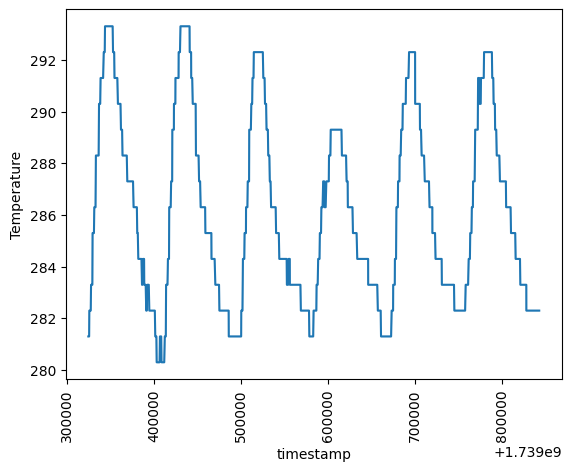

In [941]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='temperature')
plt.xticks(rotation=90)
plt.ylabel('Temperature')

## Line Plot
- `x` = `timestamp`
- `y` = `pressure`

Text(0, 0.5, 'Pressure')

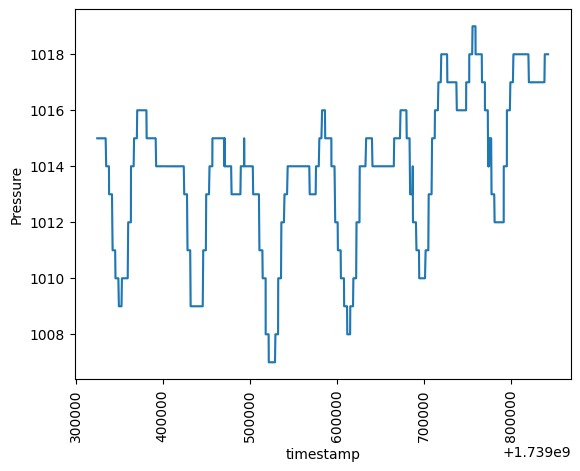

In [942]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='pressure')
plt.xticks(rotation=90)
plt.ylabel('Pressure')

## Line Plot
- `x` = `timestamp`
- `y` = `humidity`

Text(0, 0.5, 'Humidity')

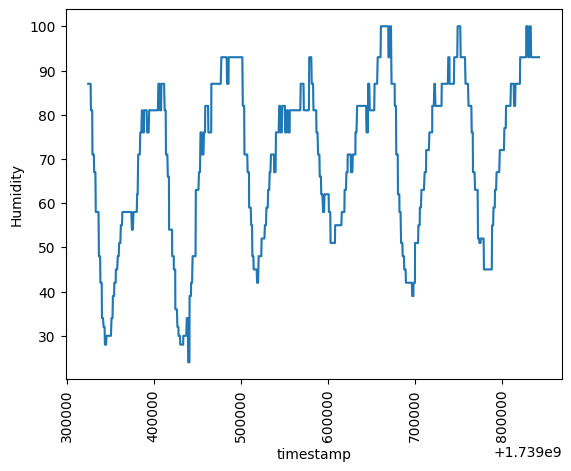

In [943]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='humidity')
plt.xticks(rotation=90)
plt.ylabel('Humidity')

## Line Plot
- `x` = `timestamp`
- `y` = `visibility`

Text(0, 0.5, 'Visibility')

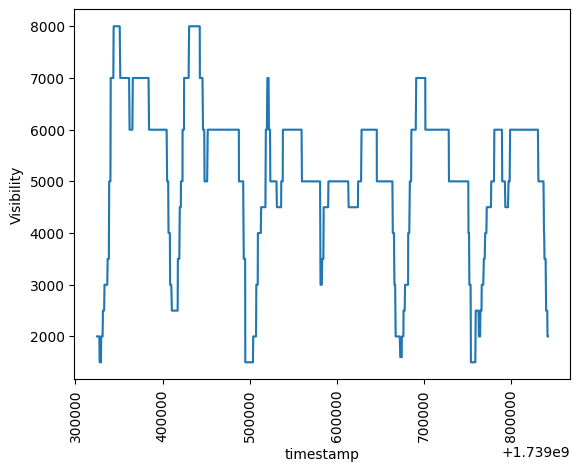

In [944]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='visibility')
plt.xticks(rotation=90)
plt.ylabel('Visibility')

## Line Plot
- `x` = `timestamp`
- `y` = `wind_speed`

Text(0, 0.5, 'Wind Speed')

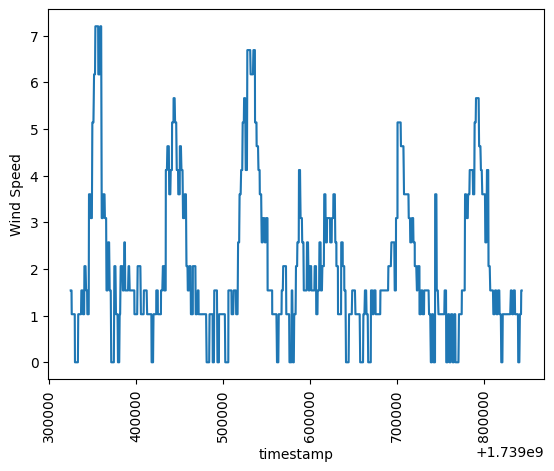

In [945]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='wind_speed')
plt.xticks(rotation=90)
plt.ylabel('Wind Speed')

## Line Plot
- `x` = `timestamp`
- `y` = `clouds_percentage`

Text(0, 0.5, 'Cloud Percentage')

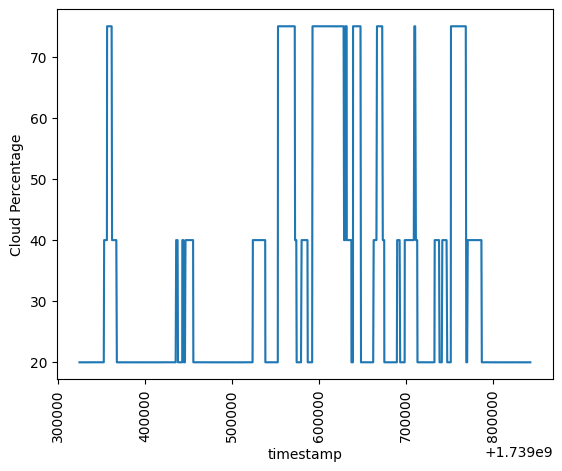

In [946]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='clouds_percentage')
plt.xticks(rotation=90)
plt.ylabel('Cloud Percentage')

## Converting String Datetime to Datetime Object

In [947]:
# 2025-02-12 07:29:14 -> %Y-%m-%d %H:%M:%S
weather_data_unique['datetime'] = pd.to_datetime(weather_data_unique['datetime'], format='%Y-%m-%d %H:%M:%S')
weather_data_unique['sunrise'] = pd.to_datetime(weather_data_unique['sunrise'], format='%Y-%m-%d %H:%M:%S')
weather_data_unique['sunset'] = pd.to_datetime(weather_data_unique['sunset'], format='%Y-%m-%d %H:%M:%S')

## Getting Sunrise and Sunset in Hrs:Mins 

In [948]:
weather_data_unique['sunrise_hm'] = weather_data_unique['sunrise'].dt.hour.astype(str) + ":" + weather_data_unique['sunrise'].dt.minute.astype(str)
weather_data_unique['sunset_hm'] = weather_data_unique['sunset'].dt.hour.astype(str) + ":" + weather_data_unique['sunset'].dt.minute.astype(str)

In [949]:
weather_data_unique.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52


## Line Plot
- `x` = `timestamp`
- `y` = `sunrise_hm`

Text(0, 0.5, 'Sunrise (HH:MM)')

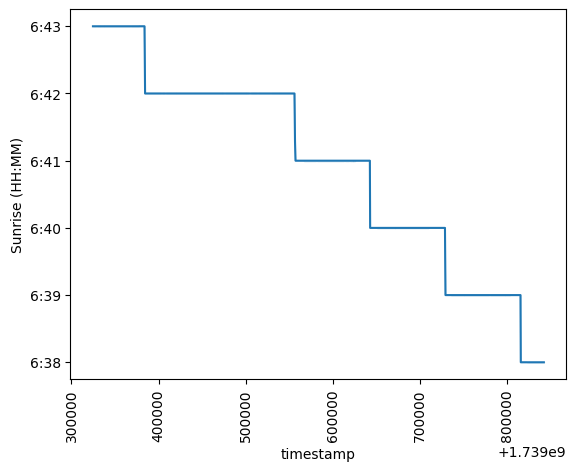

In [950]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='sunrise_hm')
plt.xticks(rotation=90)
plt.ylabel('Sunrise (HH:MM)')

## Line Plot
- `x` = `timestamp`
- `y` = `sunset_hm`

Text(0, 0.5, 'Sunset (HH:MM)')

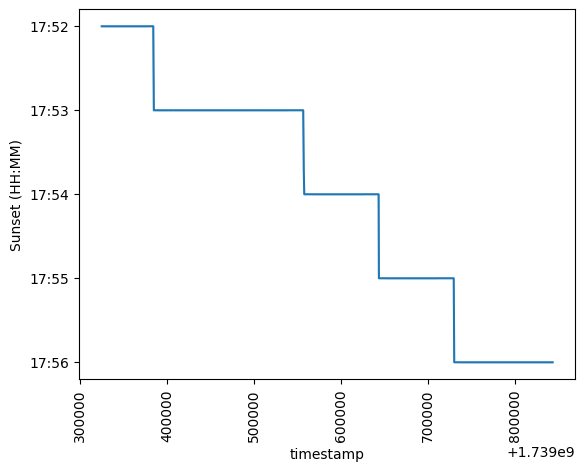

In [951]:
sns.lineplot(data=weather_data_unique, x='timestamp', y='sunset_hm')
plt.xticks(rotation=90)
plt.ylabel('Sunset (HH:MM)')

In [952]:
weather_data_unique.columns.unique()

Index(['timestamp', 'datetime', 'longitude', 'latitude', 'weather_id',
       'weather_main', 'weather_description', 'temperature', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level',
       'ground_level', 'visibility', 'wind_speed', 'wind_degree',
       'clouds_percentage', 'country', 'sunrise', 'sunrise_timestamp',
       'sunset', 'sunset_timestamp', 'timezone', 'city_id', 'city_name',
       'sunrise_hm', 'sunset_hm'],
      dtype='object')

## Scatter Plot
- `x` = `weather_description`
- `y` = `temperature`

Text(0, 0.5, 'Temperature')

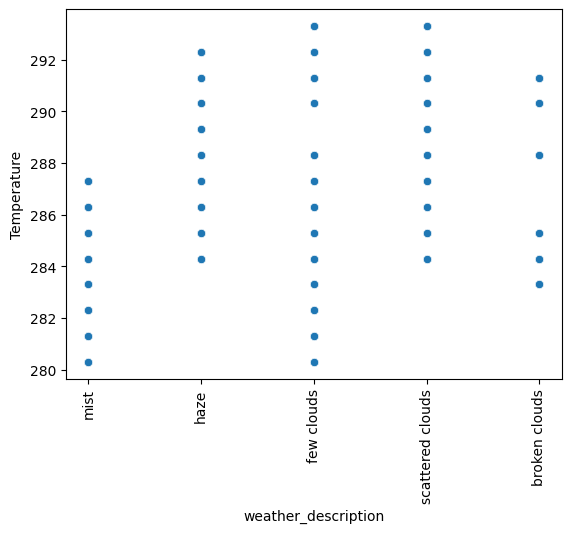

In [953]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='temperature')
plt.xticks(rotation=90)
plt.ylabel('Temperature')

## Scatter Plot
- `x` = `weather_description`
- `y` = `humidity`

Text(0, 0.5, 'Humidity')

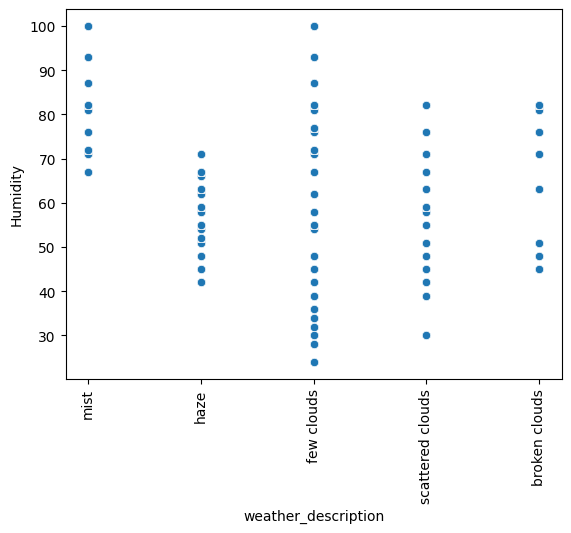

In [954]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='humidity')
plt.xticks(rotation=90)
plt.ylabel('Humidity')

## Scatter Plot
- `x` = `weather_description`
- `y` = `pressure`

Text(0, 0.5, 'Pressure')

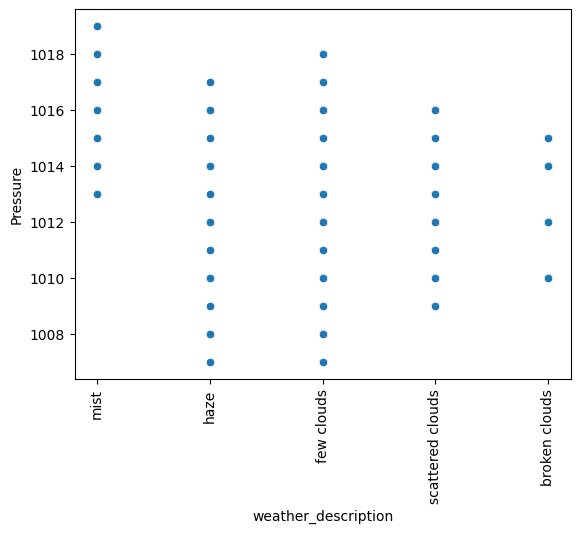

In [955]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='pressure')
plt.xticks(rotation=90)
plt.ylabel('Pressure')

## Scatter Plot
- `x` = `weather_description`
- `y` = `visibility`

Text(0, 0.5, 'Visibility')

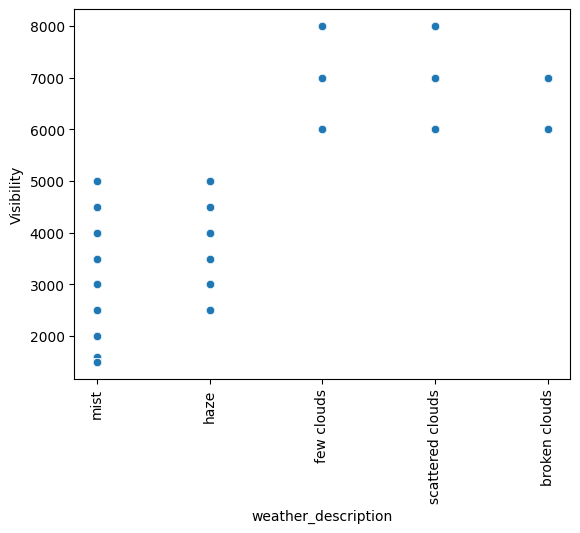

In [956]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='visibility')
plt.xticks(rotation=90)
plt.ylabel('Visibility')

## Scatter Plot
- `x` = `weather_description`
- `y` = `wind_speed`

Text(0, 0.5, 'Wind Speed')

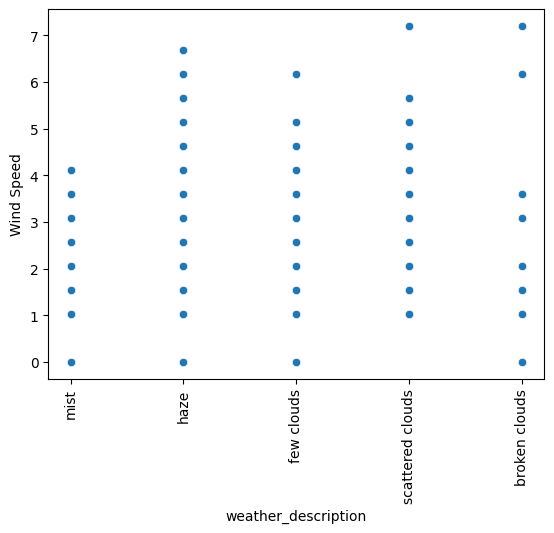

In [957]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='wind_speed')
plt.xticks(rotation=90)
plt.ylabel('Wind Speed')

## Scatter Plot
- `x` = `weather_description`
- `y` = `clouds_percentage`

Text(0, 0.5, 'Cloulds Percentage')

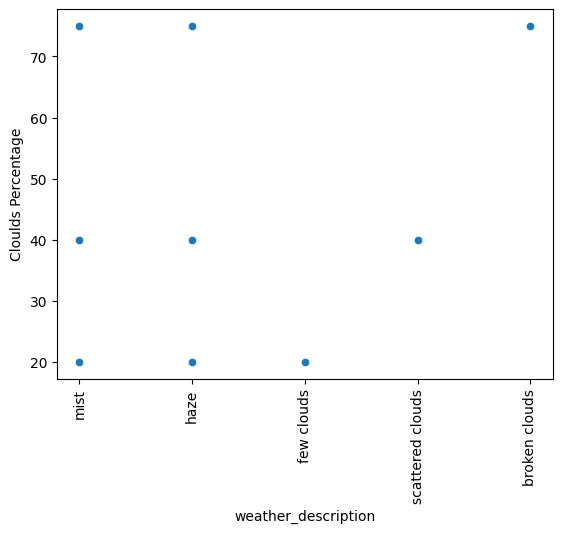

In [958]:
sns.scatterplot(data=weather_data_unique, x='weather_description', y='clouds_percentage')
plt.xticks(rotation=90)
plt.ylabel('Cloulds Percentage')

## Dropping Columns
- `timestamp` 
- `longitude`
- `latitude`
- `weather_id` 
- `country` 
- `city_id`
- `city_name`
- `sunrise`
- `sunrise_timestamp`
- `sunset`
- `sunset_timestamp`
- `timezone`
- `weather_main` 
- `weather_description`
- `datetime`

In [959]:
final_data = weather_data_unique.drop(columns=['timestamp', 'longitude', 'latitude', 'weather_id', 'country', 'city_id', 'city_name', 'sunrise', 'sunrise_timestamp', 'sunset', 'sunset_timestamp', 'timezone', 'weather_main', 'weather_description', 'datetime'], axis=1)
final_data.head()

,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage,sunrise_hm,sunset_hm
0,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
1,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
2,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
3,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
4,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52


In [960]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        63795 non-null  float64
 1   feels_like         63795 non-null  float64
 2   temp_min           63795 non-null  float64
 3   temp_max           63795 non-null  float64
 4   pressure           63795 non-null  int64  
 5   humidity           63795 non-null  int64  
 6   sea_level          63795 non-null  int64  
 7   ground_level       63795 non-null  int64  
 8   visibility         63795 non-null  int64  
 9   wind_speed         63795 non-null  float64
 10  wind_degree        63795 non-null  int64  
 11  clouds_percentage  63795 non-null  int64  
 12  sunrise_hm         63795 non-null  object 
 13  sunset_hm          63795 non-null  object 
dtypes: float64(5), int64(7), object(2)
memory usage: 6.8+ MB


In [961]:
final_data.describe()

,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage
count,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000,63795.000000
mean,286.275594,285.549668,286.275594,286.275594,1013.646587,69.152379,1013.646587,849.942848,5266.357865,2.080942,117.674269,33.370092
std,3.723176,3.516453,3.723176,3.723176,2.592418,19.063112,2.592418,1.736514,1552.782738,1.629196,105.049298,20.606924
min,280.300000,278.970000,280.300000,280.300000,1007.000000,24.000000,1007.000000,846.000000,1500.000000,0.000000,0.000000,20.000000
25%,283.300000,282.490000,283.300000,283.300000,1012.000000,55.000000,1012.000000,849.000000,4500.000000,1.030000,0.000000,20.000000
50%,285.300000,284.840000,285.300000,285.300000,1014.000000,72.000000,1014.000000,850.000000,6000.000000,1.540000,120.000000,20.000000
75%,289.300000,288.410000,289.300000,289.300000,1015.000000,82.000000,1015.000000,851.000000,6000.000000,3.090000,220.000000,40.000000
max,293.300000,292.260000,293.300000,293.300000,1019.000000,100.000000,1019.000000,854.000000,8000.000000,7.200000,350.000000,75.000000


In [962]:
final_data.head()

,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage,sunrise_hm,sunset_hm
0,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
1,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
2,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
3,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52
4,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20,6:43,17:52


## Getting only Numeric Data (Float64 and Int64)

In [963]:
numeric_col = final_data.select_dtypes(include=['float64', 'int64'])
numeric_col.head()

,temperature,feels_like,temp_min,temp_max,pressure,humidity,sea_level,ground_level,visibility,wind_speed,wind_degree,clouds_percentage
0,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20
1,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20
2,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20
3,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20
4,281.3,280.64,281.3,281.3,1015,87,1015,850,2000,1.54,100,20


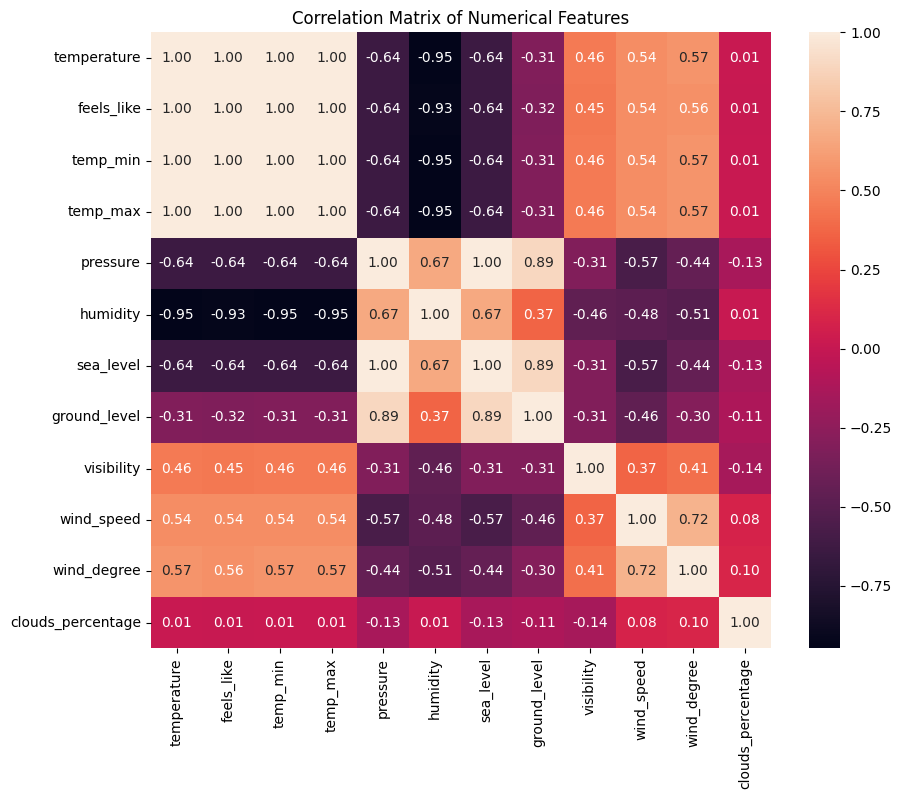

In [964]:
correlation_matrix = numeric_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [965]:
weather_data_unique.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52


In [966]:
weather_data_unique['weather_main'].unique()

array(['Mist', 'Haze', 'Clouds'], dtype=object)

## Weather Data (Only Haze)

In [967]:
weather_data_haze = weather_data_unique.loc[weather_data_unique['weather_main']=='Haze']
weather_data_haze.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
1402,1739333534,2025-02-12 09:57:14,85.324,27.7172,721,Haze,haze,288.3,287.39,288.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1403,1739333534,2025-02-12 09:57:14,85.324,27.7172,721,Haze,haze,288.3,287.39,288.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1404,1739333534,2025-02-12 09:57:14,85.324,27.7172,721,Haze,haze,288.3,287.39,288.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1405,1739333534,2025-02-12 09:57:14,85.324,27.7172,721,Haze,haze,288.3,287.39,288.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1406,1739333534,2025-02-12 09:57:14,85.324,27.7172,721,Haze,haze,288.3,287.39,288.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52


### Sorting Weather Data (Only Haze) by Temperature

In [968]:
weather_data_haze_sorted_temperature = weather_data_haze.sort_values(by='temperature')
weather_data_haze_sorted_temperature.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
15122,1739416431,2025-02-13 08:58:51,85.324,27.7172,721,Haze,haze,284.3,283.19,284.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
15134,1739416902,2025-02-13 09:06:42,85.324,27.7172,721,Haze,haze,284.3,283.19,284.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
15133,1739416431,2025-02-13 08:58:51,85.324,27.7172,721,Haze,haze,284.3,283.19,284.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
15132,1739416431,2025-02-13 08:58:51,85.324,27.7172,721,Haze,haze,284.3,283.19,284.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
15131,1739416431,2025-02-13 08:58:51,85.324,27.7172,721,Haze,haze,284.3,283.19,284.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53


### Plot Humidity Vs Temperature in Haze Condition

[Text(0.5, 1.0, 'Humidity Vs Temperature for Haze')]

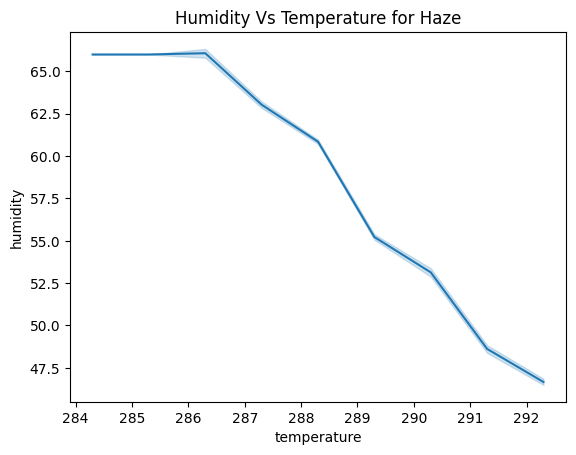

In [969]:
sns.lineplot(data=weather_data_haze_sorted_temperature, x='temperature', y='humidity').set(title='Humidity Vs Temperature for Haze')


## Weather Data (Only Mist)

In [970]:
weather_data_mist = weather_data_unique.loc[weather_data_unique['weather_main']=='Mist']
weather_data_mist.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
0,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
1,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2,1739324654,2025-02-12 07:29:14,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
3,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
4,1739325598,2025-02-12 07:44:58,85.324,27.7172,701,Mist,mist,281.3,280.64,281.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52


### Sorting Weather Data (Only Mist) by Temperature

In [971]:
weather_data_mist_sorted_temperature = weather_data_mist.sort_values(by='temperature')
weather_data_mist_sorted_temperature.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
13426,1739405322,2025-02-13 05:53:42,85.324,27.7172,701,Mist,mist,280.3,280.3,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13411,1739405322,2025-02-13 05:53:42,85.324,27.7172,701,Mist,mist,280.3,280.3,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13410,1739405322,2025-02-13 05:53:42,85.324,27.7172,701,Mist,mist,280.3,280.3,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13409,1739405322,2025-02-13 05:53:42,85.324,27.7172,701,Mist,mist,280.3,280.3,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13408,1739405322,2025-02-13 05:53:42,85.324,27.7172,701,Mist,mist,280.3,280.3,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53


### Plot Humidity Vs Temperature in Haze Condition

[Text(0.5, 1.0, 'Humidity Vs Temperature for Mist')]

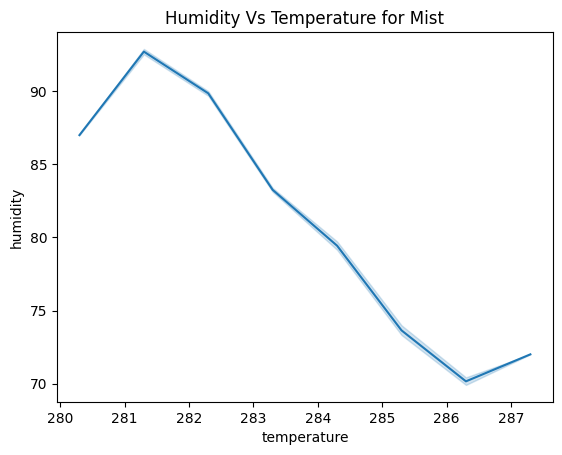

In [972]:
sns.lineplot(data=weather_data_mist_sorted_temperature, x='temperature', y='humidity').set(title='Humidity Vs Temperature for Mist')


## Weather Data (Only Clouds)

In [973]:
weather_data_clouds = weather_data_unique.loc[weather_data_unique['weather_main']=='Clouds']
weather_data_clouds.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
2688,1739340457,2025-02-12 11:52:37,85.324,27.7172,801,Clouds,few clouds,291.3,290.06,291.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2689,1739340457,2025-02-12 11:52:37,85.324,27.7172,801,Clouds,few clouds,291.3,290.06,291.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2690,1739340457,2025-02-12 11:52:37,85.324,27.7172,801,Clouds,few clouds,291.3,290.06,291.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2691,1739340457,2025-02-12 11:52:37,85.324,27.7172,801,Clouds,few clouds,291.3,290.06,291.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52
2692,1739340457,2025-02-12 11:52:37,85.324,27.7172,801,Clouds,few clouds,291.3,290.06,291.3,...,NP,2025-02-12 06:43:36,1739321916,2025-02-12 17:52:28,1739362048,20700,1282682,Thapathali,6:43,17:52


### Sorting Weather Data (Only Clouds) by Temperature

In [974]:
weather_data_clouds_sorted_temperature = weather_data_clouds.sort_values(by='temperature')
weather_data_clouds_sorted_temperature.head()

,timestamp,datetime,longitude,latitude,weather_id,weather_main,weather_description,temperature,feels_like,temp_min,...,country,sunrise,sunrise_timestamp,sunset,sunset_timestamp,timezone,city_id,city_name,sunrise_hm,sunset_hm
13116,1739403202,2025-02-13 05:18:22,85.324,27.7172,801,Clouds,few clouds,280.3,278.97,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13174,1739403803,2025-02-13 05:28:23,85.324,27.7172,801,Clouds,few clouds,280.3,278.97,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13175,1739403803,2025-02-13 05:28:23,85.324,27.7172,801,Clouds,few clouds,280.3,278.97,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13176,1739403803,2025-02-13 05:28:23,85.324,27.7172,801,Clouds,few clouds,280.3,278.97,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53
13178,1739403803,2025-02-13 05:28:23,85.324,27.7172,801,Clouds,few clouds,280.3,278.97,280.3,...,NP,2025-02-13 06:42:51,1739408271,2025-02-13 17:53:12,1739448492,20700,1282682,Thapathali,6:42,17:53


### Plot Humidity Vs Temperature in Clouds Condition

[Text(0.5, 1.0, 'Humidity Vs Temperature for Clouds')]

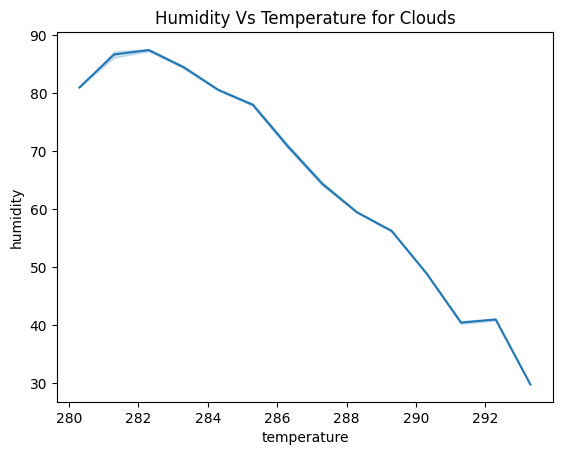

In [975]:
sns.lineplot(data=weather_data_clouds_sorted_temperature, x='temperature', y='humidity').set(title='Humidity Vs Temperature for Clouds')


## Counts
- Humidity
- Temperature
- Pressure

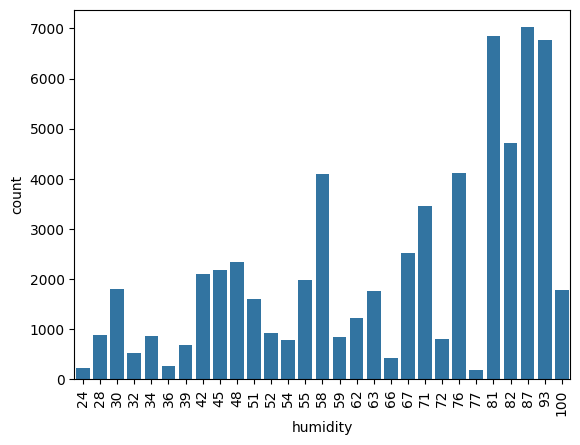

In [976]:
sns.countplot(data=weather_data_unique, x='humidity').tick_params(axis='x', rotation=90)


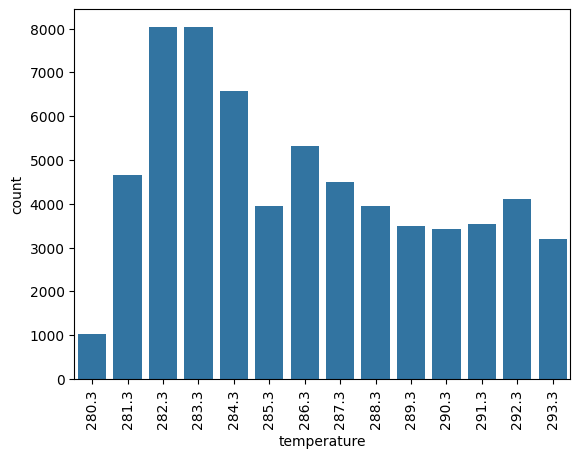

In [977]:
sns.countplot(data=weather_data_unique, x='temperature').tick_params(axis='x', rotation=90)

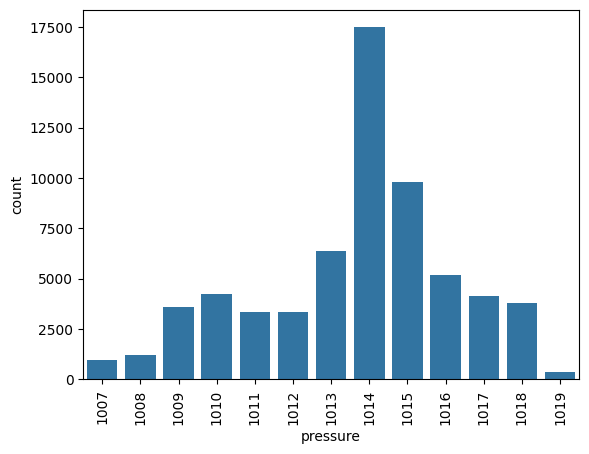

In [978]:
sns.countplot(data=weather_data_unique, x='pressure').tick_params(axis='x', rotation=90)


## ScatterPlot 
- `x` = `humidity`
- `y` = `temperature`
- `hue` = `weather_main`

<Axes: xlabel='humidity', ylabel='temperature'>

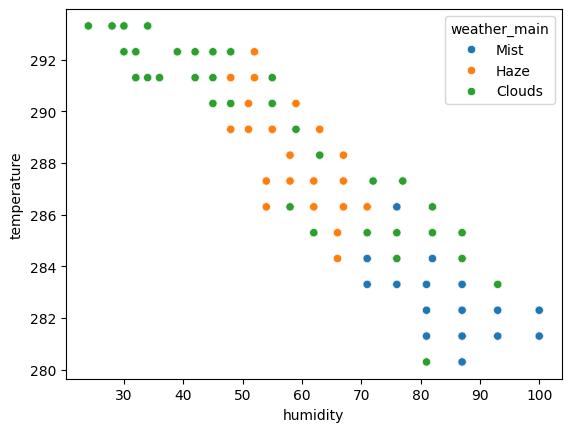

In [979]:
sns.scatterplot(data=weather_data_unique, x='humidity', y='temperature', hue='weather_main')


## ScatterPlot 
- `x` = `pressure`
- `y` = `temperature`
- `hue` = `weather_main`

<Axes: xlabel='pressure', ylabel='temperature'>

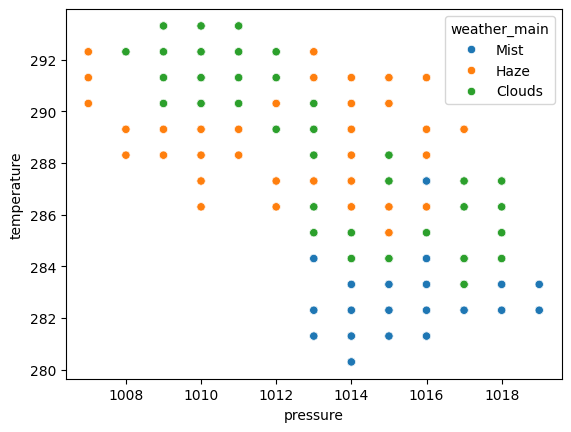

In [980]:
sns.scatterplot(data=weather_data_unique, x='pressure', y='temperature', hue='weather_main')

## ScatterPlot 
- `x` = `pressure`
- `y` = `temperature`
- `hue` = `weather_main`

<Axes: xlabel='pressure', ylabel='humidity'>

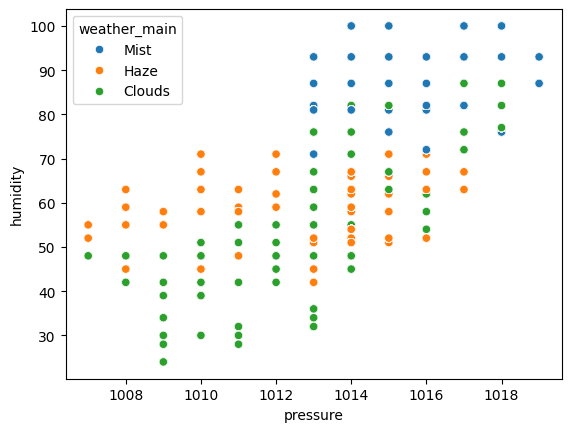

In [981]:
sns.scatterplot(data=weather_data_unique, x='pressure', y='humidity', hue='weather_main')

# Logistic Regression : Weather

In [982]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Creating Train and Test Set

In [983]:
x_col = ['temperature', 'humidity', 'pressure']
y_col = weather_data_unique['weather_main']

In [984]:
X_train, X_test, y_train, y_test = train_test_split(final_data[x_col], y_col, test_size=0.2, random_state=42)

In [1004]:
X_test.head()

,temperature,humidity,pressure
6573,289.3,55,1012
30691,289.3,59,1008
11247,282.3,81,1015
63128,282.3,93,1017
273,282.3,87,1015


In [1003]:
y_test.head()

6573     Clouds
30691      Haze
11247    Clouds
63128      Mist
273        Mist
Name: weather_main, dtype: object

## Fitting Train Data for Logistic Regression Model

In [985]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Predicting Weather Main Based on Test Data

In [986]:
y_pred = model.predict(X_test)
y_pred

array(['Clouds', 'Clouds', 'Mist', ..., 'Clouds', 'Clouds', 'Clouds'],
      shape=(12759,), dtype=object)

## Testing Model

In [ ]:
from sklearn.metrics import accuracy_score

In [988]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.6216004389058704

# Export Model

In [994]:
import pickle

In [995]:
with open("./kathmandu_weather_data_model.pkl", "wb") as file:
            pickle.dump(model, file)

# Prediction with Model

In [996]:
import numpy as np

In [1000]:
kathmandu_weather_data_model = pickle.load(open('kathmandu_weather_data_model.pkl', 'rb'))

In [1010]:
# Temperature, Humidity, Pressure
# 289.3	55	1012
X = np.array([[289.3,55,1012]])
y = kathmandu_weather_data_model.predict(X)
y

/Users/prajunadhikary/Desktop/5 Python AIML/Projects/.venv_weather_prediction/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Clouds'], dtype=object)

In [1011]:
X = np.array([[289.3,59,1008]])
y = kathmandu_weather_data_model.predict(X)
y

/Users/prajunadhikary/Desktop/5 Python AIML/Projects/.venv_weather_prediction/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Clouds'], dtype=object)

In [1012]:
X = np.array([[282.3,87,1015]])
y = kathmandu_weather_data_model.predict(X)
y

/Users/prajunadhikary/Desktop/5 Python AIML/Projects/.venv_weather_prediction/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Mist'], dtype=object)